Visualización de datos
============================

PEC 2: Estudio de técnicas de visualización de datos
-----------------------------------------------------

# Diagrama de redes

El siguiente es un código escrito en python para realizar un diagrama de red que muestra las interacciones entre individuos de una población de delfines nariz de botella (*Tursiops spp.*) que habitan en Doubtful Sound, un fiordo de Nueva Zelanda. Los individuos fueron observados entre 1994 y 2001. El [set de datos](http://konect.cc/networks/dolphins/) se basa en un artículo científico publicado en Bahavioral Ecology and Sociobiology en 2003. 

Cita:
* D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson (2003). The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations. Behav. Ecol. and Sociobiol., 54:396–405. 


---

In [31]:
# Datos disponibles para el ejercicio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 
import community.community_louvain as community_louvain



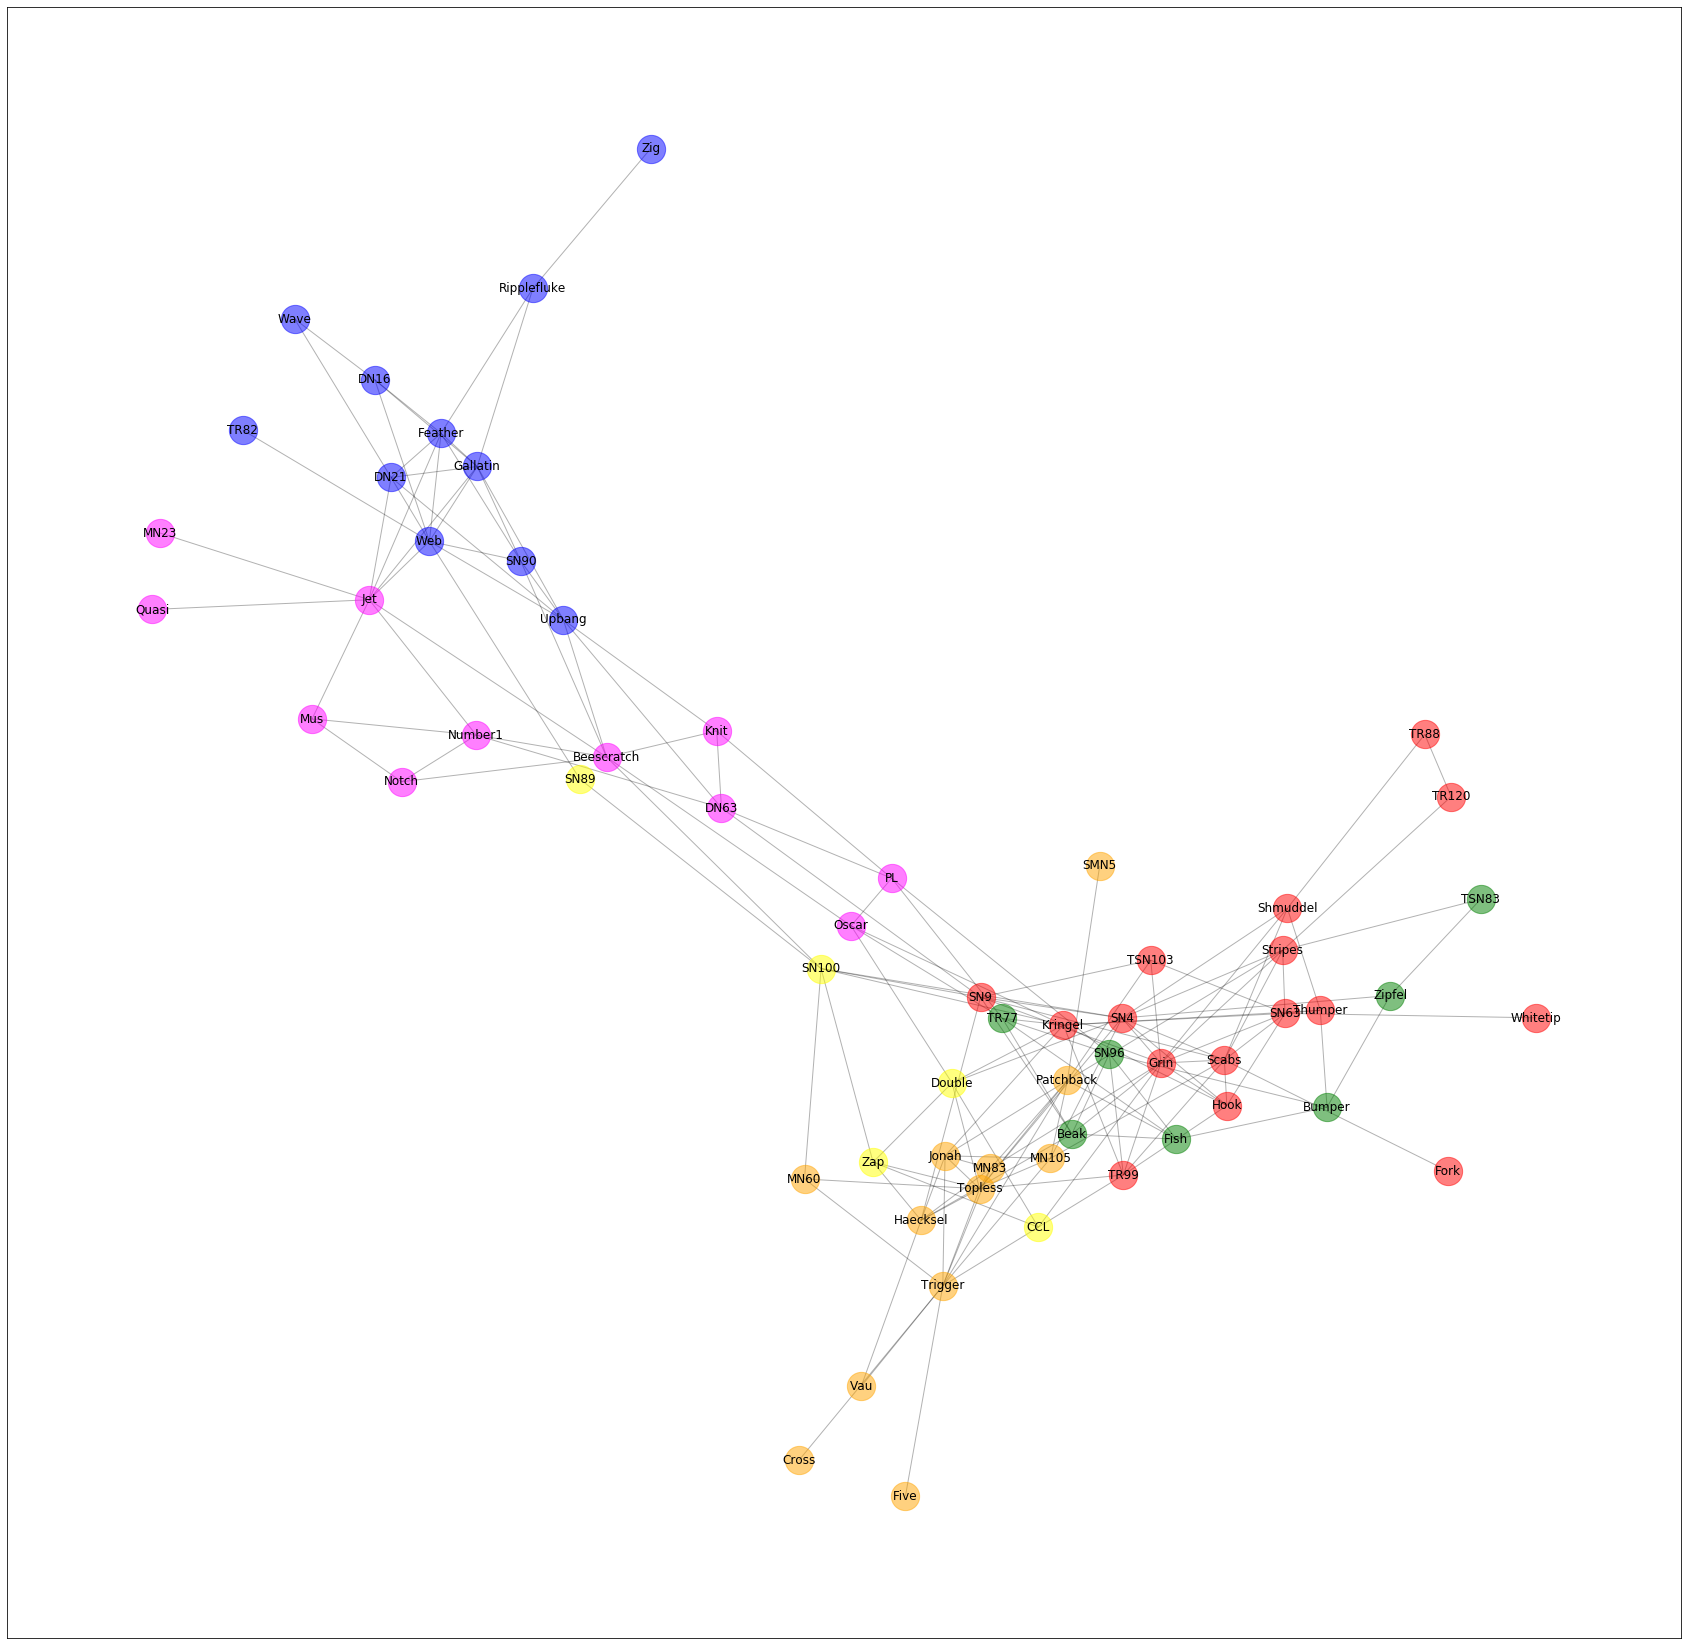

In [37]:
# Cargamos los datos del fichero dolphins.gml
G_book1=nx.read_gml('/home/nicolas/Descargas/dolphins.gml')

# Generamos una nueva figura.Cambio el tamaño de la figura para mejorar la visualización
plt.figure(1, figsize=(30, 30)) 

# Calculamos las posiciones de los nodos del grafo en el plano con el algoritmo spring.
graph_pos = nx.spring_layout(G_book1)

# Detectamos las comunidades existentes en el grafo.
partition = community_louvain.best_partition(G_book1)

# Definimos los colores que utilizaremos para los nodos.
colors = ['green', 'blue', 'red', 'orange', 'yellow', 'magenta', 'white']

# Para cada comunidad detectada, mostramos los nodos:
for count, com in enumerate(set(partition.values())):

    # Seleccionamos los nodos de la comunidad que estamos procesando.
    list_nodes = [nodes for nodes in partition.keys() 
                  if partition[nodes] == com]
    
    # Mostramos los nodos, coloreados según la comunidad a la que pertenecen.
    nx.draw_networkx_nodes(G_book1, graph_pos, list_nodes, 
                           node_size = 800,
                           node_color = colors[count],
                           alpha = 0.5)

# Mostramos las aristas del grafo, especificando la posición, 
# el color y la transparencia.
nx.draw_networkx_edges(G_book1, graph_pos, edge_color='k', alpha=0.3)

# Mostramos las etiquetas, indicando la fuente y el tamaño.
a = nx.draw_networkx_labels(G_book1, graph_pos, font_size=12, font_family='sans-serif')


plt.show()